In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
deno = load_model('/content/drive/MyDrive/Project/Denoise_models/denoise11.h5')

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Activation, Dropout
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from skimage.util import random_noise
from sklearn.metrics import accuracy_score

1/1 [==============================] - 171s 171s/step


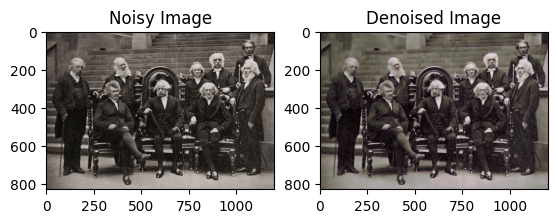

In [ ]:
test_image = plt.imread('img11.jpg') / 255.

#test_image_resized = cv2.resize(test_image, (input_shape[1], input_shape[0]))


test_noisy_image = np.clip(test_image + np.random.normal(0, 0, test_image.shape), 0, 1)

denoised_test_image = deno.predict(test_noisy_image.reshape((1,) + test_noisy_image.shape)).squeeze()


denoised_test_image_resized = cv2.resize(denoised_test_image, (test_image.shape[1], test_image.shape[0]))

# Visualize the results
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(test_noisy_image)
plt.title('Noisy Image')
plt.subplot(132)
plt.imshow(denoised_test_image)
plt.title('Denoised Image')
plt.show()

In [ ]:
import cv2
import numpy as np


# Calculate MSE
mse = np.mean((test_noisy_image - denoised_test_image) ** 2)

# Calculate PSNR
max_pixel_value = 1.0  # maximum pixel value of the image
psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))

print('MSE:', mse)
print('PSNR:', psnr)


MSE: 0.0026694248686403924
PSNR: 25.73582297916792


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
